In [18]:
import pandas as pd
import matplotlib
import math
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from collections import deque
import tensorflow as tf
from tensorflow import keras
from sklearn import linear_model
from sklearn import ensemble
from sklearn import kernel_ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import random
import pickle
%matplotlib inline

from google.colab import drive #(NO NEED TO RUN THIS AGAIN)
drive.mount('/content/gdrive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import CSVs from github

In [0]:
X_train = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data/dengue_features_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data/dengue_features_test.csv")

X_train_base_imputed = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data_mean_imputated/dengue_features_train_mean_imputed.csv?token=AHUIMVLMT4UVKYXBRKUQHA256Z2NG")
y_train = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data/dengue_labels_train.csv?token=AHUIMVJZ2V5HBUEJXHFV6HK56Z2ZI")

X_test_base_imputed = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data_mean_imputated/dengue_features_test_mean_imputed.csv?token=AHUIMVPYWGROYT5V3QFPBZ256Z256")

X_train_regression_imputed = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data_regressed_imputed/dengue_features_train_regressed_imputed.csv?token=AK72LX6E665WSTCSLAPM74K57A4DA")
X_test_regression_imputed = pd.read_csv("https://raw.githubusercontent.com/dineshjagai/CIS-520-Final-Project/master/data_regressed_imputed/dengue_features_test_regressed_imputed.csv?token=AK72LX33SSHA7LSYAIVDTPC57A4HG")

In [0]:
data_train = pd.DataFrame.join(X_train_base_imputed, y_train, rsuffix = "_r")
data_train = data_train.drop(['city_r', 'year_r', 'weekofyear_r'], axis=1)

data_train_missing = pd.DataFrame.join(X_train, y_train, rsuffix = "_r")
data_train_regressed = data_train_missing.copy()
data_train_missing = data_train_missing.drop(['city_r', 'year_r', 'weekofyear_r'], axis=1)

# Extract city specific data and drop 'city' column from DataFames
data_test_sj = X_test_base_imputed[X_test_base_imputed['city'] == 'sj']
data_test_iq = X_test_base_imputed[X_test_base_imputed['city'] == 'iq']
data_test_sj = data_test_sj.drop(['city'], axis=1)
data_test_iq = data_test_iq.drop(['city'], axis=1)

data_train_sj = data_train[data_train['city'] == 'sj']
data_train_iq = data_train[data_train['city'] == 'iq']
data_train_sj = data_train_sj.drop(['city'], axis=1)
data_train_iq = data_train_iq.drop(['city'], axis=1)

data_train_missing_sj = data_train_missing[data_train_missing['city'] == 'sj']
data_train_missing_iq = data_train_missing[data_train_missing['city'] == 'iq']
data = data_train_missing_sj.copy()
data2 = data_train_missing_iq.copy()

data_train_missing_sj = data_train_missing_sj.drop(['city'], axis=1)
data_train_missing_iq = data_train_missing_iq.drop(['city'], axis=1)

data_test_missing_sj = X_test[X_test['city'] == 'sj']
data_test_missing_iq = X_test[X_test['city'] == 'iq']
data3 = data_test_missing_sj.copy()
data4 = data_test_missing_iq.copy()

data_test_missing_sj = data_test_missing_sj.drop(['city'], axis=1)
data_test_missing_iq = data_test_missing_iq.drop(['city'], axis=1)

In [0]:
# Drop irrelevant features 
y_train_sj = data_train_sj['total_cases']
X_train_sj = data_train_sj.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)

# Convert to numpy array 
X_train_sj_np = X_train_sj.to_numpy()

y_train_sj_np = y_train_sj.to_numpy()
y_train_sj_np = np.reshape(y_train_sj_np, (len(y_train_sj_np), 1))

y_train_iq = data_train_iq['total_cases']
X_train_iq = data_train_iq.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)

X_train_iq_np = X_train_iq.to_numpy()
y_train_iq_np = y_train_iq.to_numpy()
y_train_iq_np = np.reshape(y_train_iq_np, (len(y_train_iq_np), 1))

X_test_sj = data_test_sj.drop(['week_start_date', 'year', 'weekofyear'], axis=1)
X_test_sj_np = X_test_sj.to_numpy()

X_test_iq = data_test_iq.drop(['week_start_date', 'year', 'weekofyear'], axis=1)
X_test_iq_np = X_test_iq.to_numpy()

########################################################################

X_train_missing_sj = data_train_missing_sj.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)
X_train_missing_sj_np = X_train_missing_sj.to_numpy()

X_train_missing_iq = data_train_missing_iq.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)
X_train_missing_iq_np = X_train_missing_iq.to_numpy()

X_test_missing_sj = data_test_missing_sj.drop(['week_start_date', 'year', 'weekofyear'], axis=1)
X_test_missing_sj_np = X_test_missing_sj.to_numpy()

X_test_missing_iq = data_test_missing_iq.drop(['week_start_date', 'year', 'weekofyear'], axis=1)
X_test_missing_iq_np = X_test_missing_iq.to_numpy()

# Regression Imputation

In [0]:
def regressedImpute(X_baseImputed, X_miss):
    '''
    Returns :
        X_imputed which has mean of the linearly regressed value instead of the missing values and same shape as X_miss.
    if computePerFeatureStatistics is True, also:
        list of Frobenius norms of difference between reconstructions and original data (without missing values) calculated after each imputing each column.
        list of accuracies on test set of Logistic Regression classifier trained on imputed data after each imputing each column.
    '''

    X_imputed = X_baseImputed.copy()
    (n, p) = X_imputed.shape

    # We do a linear regression based imputation here, for each column, train a classifier to predict its value based on values of other features and
    # replace the NaN with the predicted values. 
    
    for i in range(p):
        rows = np.isnan(X_miss[:, i]) 
        regress_rows = X_baseImputed[~rows]
        data = np.delete(regress_rows, i, 1)
        regress_y = X_baseImputed[~rows, i]
        missing = X_baseImputed[rows]
        miss = np.delete(missing, i, 1) 
        if (len(miss) == 0):
            continue
        clf = LinearRegression().fit(data, regress_y) 
        y_predict = clf.predict(miss)
        index = rows.nonzero()[0]
        np.put(X_imputed[:, i], index, y_predict) 

    return X_imputed

In [0]:
# Obtain baseline regression imputed features
X_regressed_sj = regressedImpute(X_train_sj_np, X_train_missing_sj_np)
X_regressed_iq = regressedImpute(X_train_iq_np, X_train_missing_iq_np)

X_test_regressed_sj = regressedImpute(X_test_sj_np, X_test_missing_sj_np)
X_test_regressed_iq = regressedImpute(X_test_iq_np, X_test_missing_iq_np)

epochs = 5

# Improve imputation by repeating process using the previous imputation as the baseline imputation for the next imputing
for i in range(epochs):
    X_copy_sj = X_regressed_sj.copy()
    X_copy_iq = X_regressed_iq.copy()
    X_test_copy_sj = X_test_regressed_sj.copy()
    X_test_copy_iq = X_test_regressed_iq.copy()
    
    X_regressed_sj = regressedImpute(X_copy_sj, X_train_missing_sj_np)
    X_regressed_iq = regressedImpute(X_copy_iq, X_train_missing_iq_np)
    
    X_test_regressed_sj = regressedImpute(X_test_copy_sj, X_test_missing_sj_np)
    X_test_regressed_iq = regressedImpute(X_test_copy_iq, X_test_missing_iq_np)

# Set up list of features
column_list = list(data_train_regressed.columns.values.tolist()) 
column_list.remove('city')
column_list.remove('year')
column_list.remove('weekofyear')
column_list.remove('week_start_date')
column_list.remove('total_cases')
column_list.remove('city_r')
column_list.remove('year_r')
column_list.remove('weekofyear_r')

# Create city DataFrames for the imputed values
sj_df = pd.DataFrame(X_regressed_sj, columns=column_list)
iq_df = pd.DataFrame(X_regressed_iq, columns=column_list)

sj_test_df = pd.DataFrame(X_test_regressed_sj, columns=column_list)
iq_test_df = pd.DataFrame(X_test_regressed_iq, columns=column_list)

# Update original DataFrames with new imputed values
data = data.reset_index(drop=True)
data2 = data2.reset_index(drop=True)
data.update(sj_df)
data2.update(iq_df)

data3 = data3.reset_index(drop=True)
data4 = data4.reset_index(drop=True)
data3.update(sj_test_df)
data4.update(iq_test_df)

# Concatenate city datasets
data_reg = pd.concat([data, data2])
data_reg = data_reg.reset_index(drop=True)

data_test_reg = pd.concat([data3, data4])
data_test_reg = pd.concat([data3, data4])

# Seperate the Data

In [0]:
# Seperate the data into their respective positions
X_data_train_sj = X_train_base_imputed[X_train_base_imputed['city'] == 'sj']
X_data_train_iq = X_train_base_imputed[X_train_base_imputed['city'] == 'iq']  
y_data_train_sj = y_train[y_train['city'] == 'sj']
y_data_train_iq = y_train[y_train['city'] == 'iq']
X_data_test_sj  = X_test[X_test['city'] == 'sj']
X_data_test_iq  = X_test[X_test['city'] == 'iq']

# Regressed data 
X_train_regression_imputed_sj = X_train_regression_imputed[X_train_regression_imputed['city'] == 'sj']
X_train_regression_imputed_iq = X_train_regression_imputed[X_train_regression_imputed['city'] == 'iq']
X_test_regression_imputed_sj = X_test_regression_imputed[X_test_regression_imputed['city'] == 'sj']
X_test_regression_imputed_iq = X_test_regression_imputed[X_test_regression_imputed['city'] == 'iq']

# drop the uncessary parts
y_data_train_sj = y_data_train_sj.drop(["city","year", "weekofyear"], axis=1)
y_data_train_iq = y_data_train_iq.drop(["city","year", "weekofyear"], axis=1)

# put features and label into one dataset (needed e.g. for correlation)
data_train_sj = pd.concat([X_data_train_sj, y_data_train_sj], axis=1)
data_train_iq = pd.concat([X_data_train_iq, y_data_train_iq], axis=1)

# Training (Mean Imputed Values)
X_data_train_sj = X_data_train_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_data_train_iq = X_data_train_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)

# Testing (Mean Imputed Values)
X_data_test_sj = X_data_test_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_data_test_iq = X_data_test_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)

#  Training Regression Imputed Values 
X_train_regression_imputed_sj = X_train_regression_imputed_sj.drop(["city","year", "week_start_date", "weekofyear", "total_cases"], axis=1)
X_train_regression_imputed_iq = X_train_regression_imputed_iq.drop(["city","year", "week_start_date", "weekofyear", "total_cases"], axis=1)

# Testing (Regression Imputed Values)
X_test_regression_imputed_sj = X_test_regression_imputed_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_test_regression_imputed_iq = X_test_regression_imputed_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)


# Visualization

## 1. Histogram for total_cases in sj and iq

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad74168f98>]],
      dtype=object)

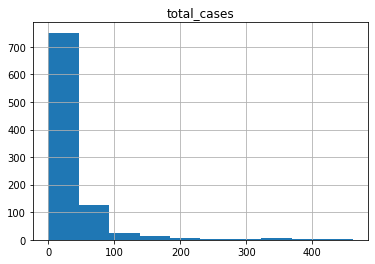

In [10]:
y_data_train_sj.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadbe2dd710>]],
      dtype=object)

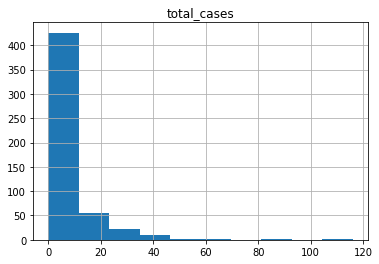

In [11]:
y_data_train_iq.hist()

## 2. Correlation Matrix for sj and iq

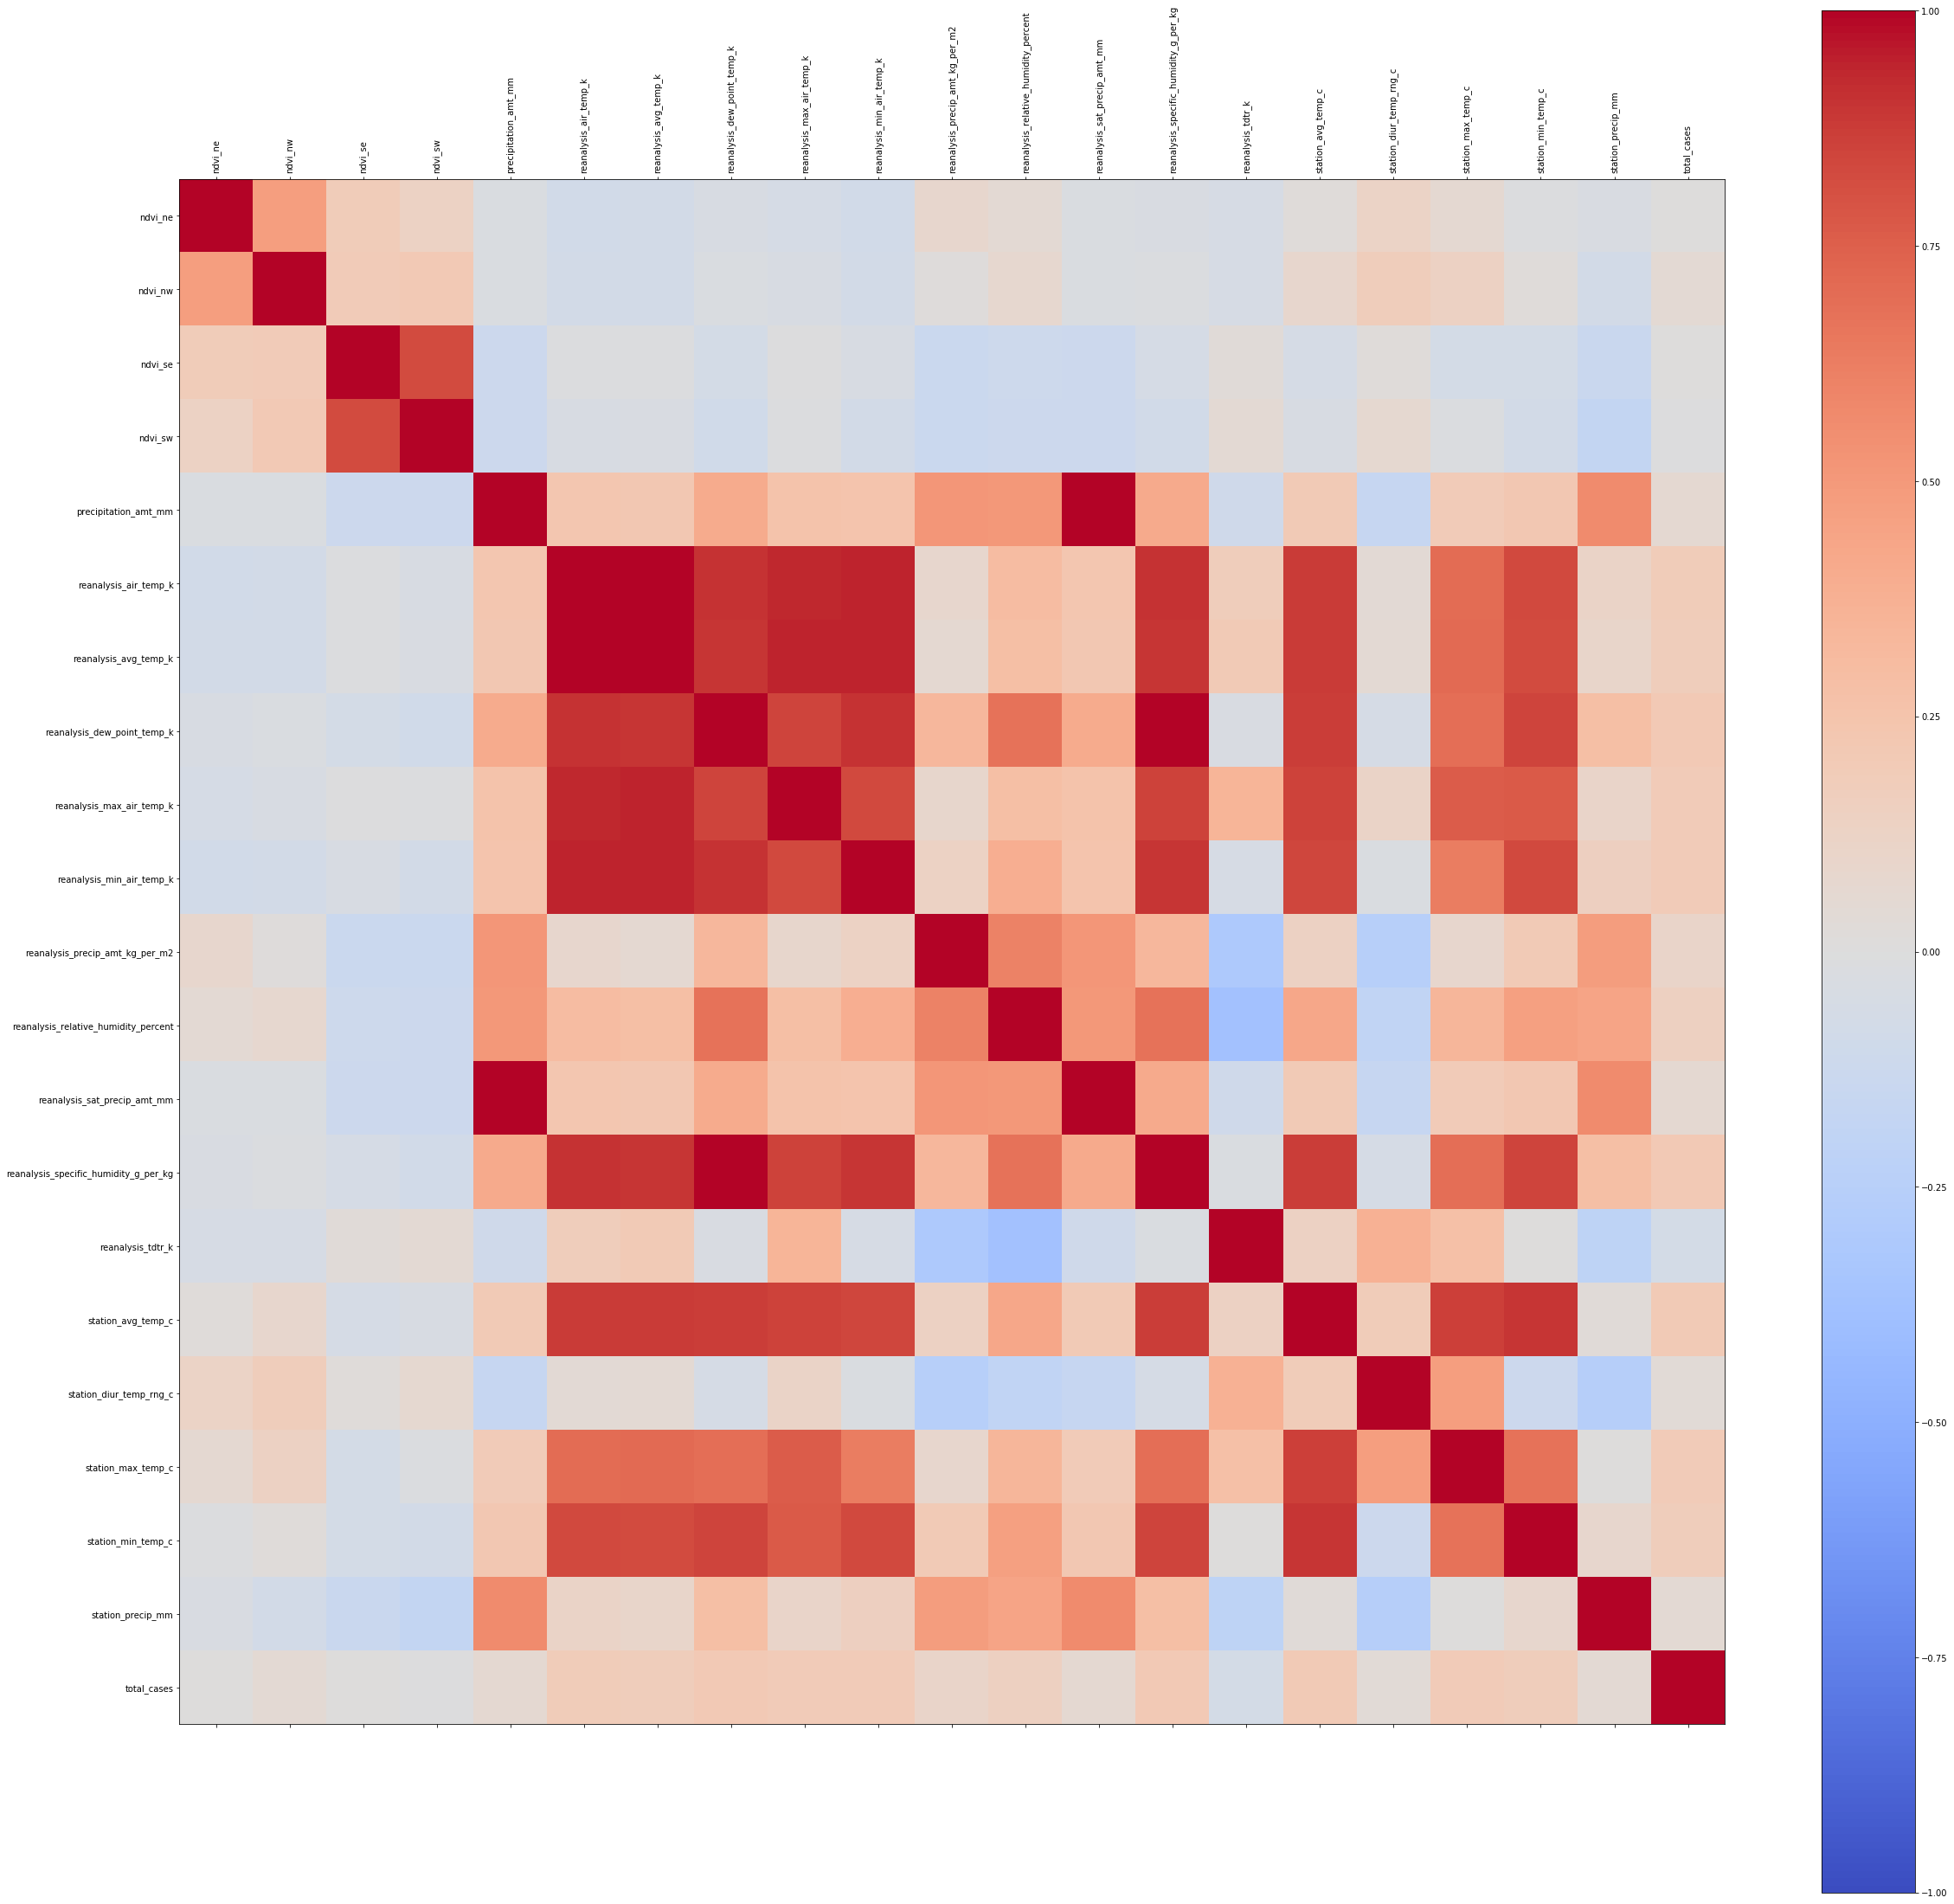

In [22]:
# plot correlation matrix for sj  (Mean Imputed Values)
data_matrix_sj = data_train_sj.drop(["city", "year", "weekofyear", "week_start_date"], axis=1)

data_matrix_sj['total_cases'] = data_matrix_sj['total_cases'].astype('float')
corr_sj = data_matrix_sj.corr()
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_sj,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_matrix_sj.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_matrix_sj.columns)
ax.set_yticklabels(data_matrix_sj.columns)
plt.show()

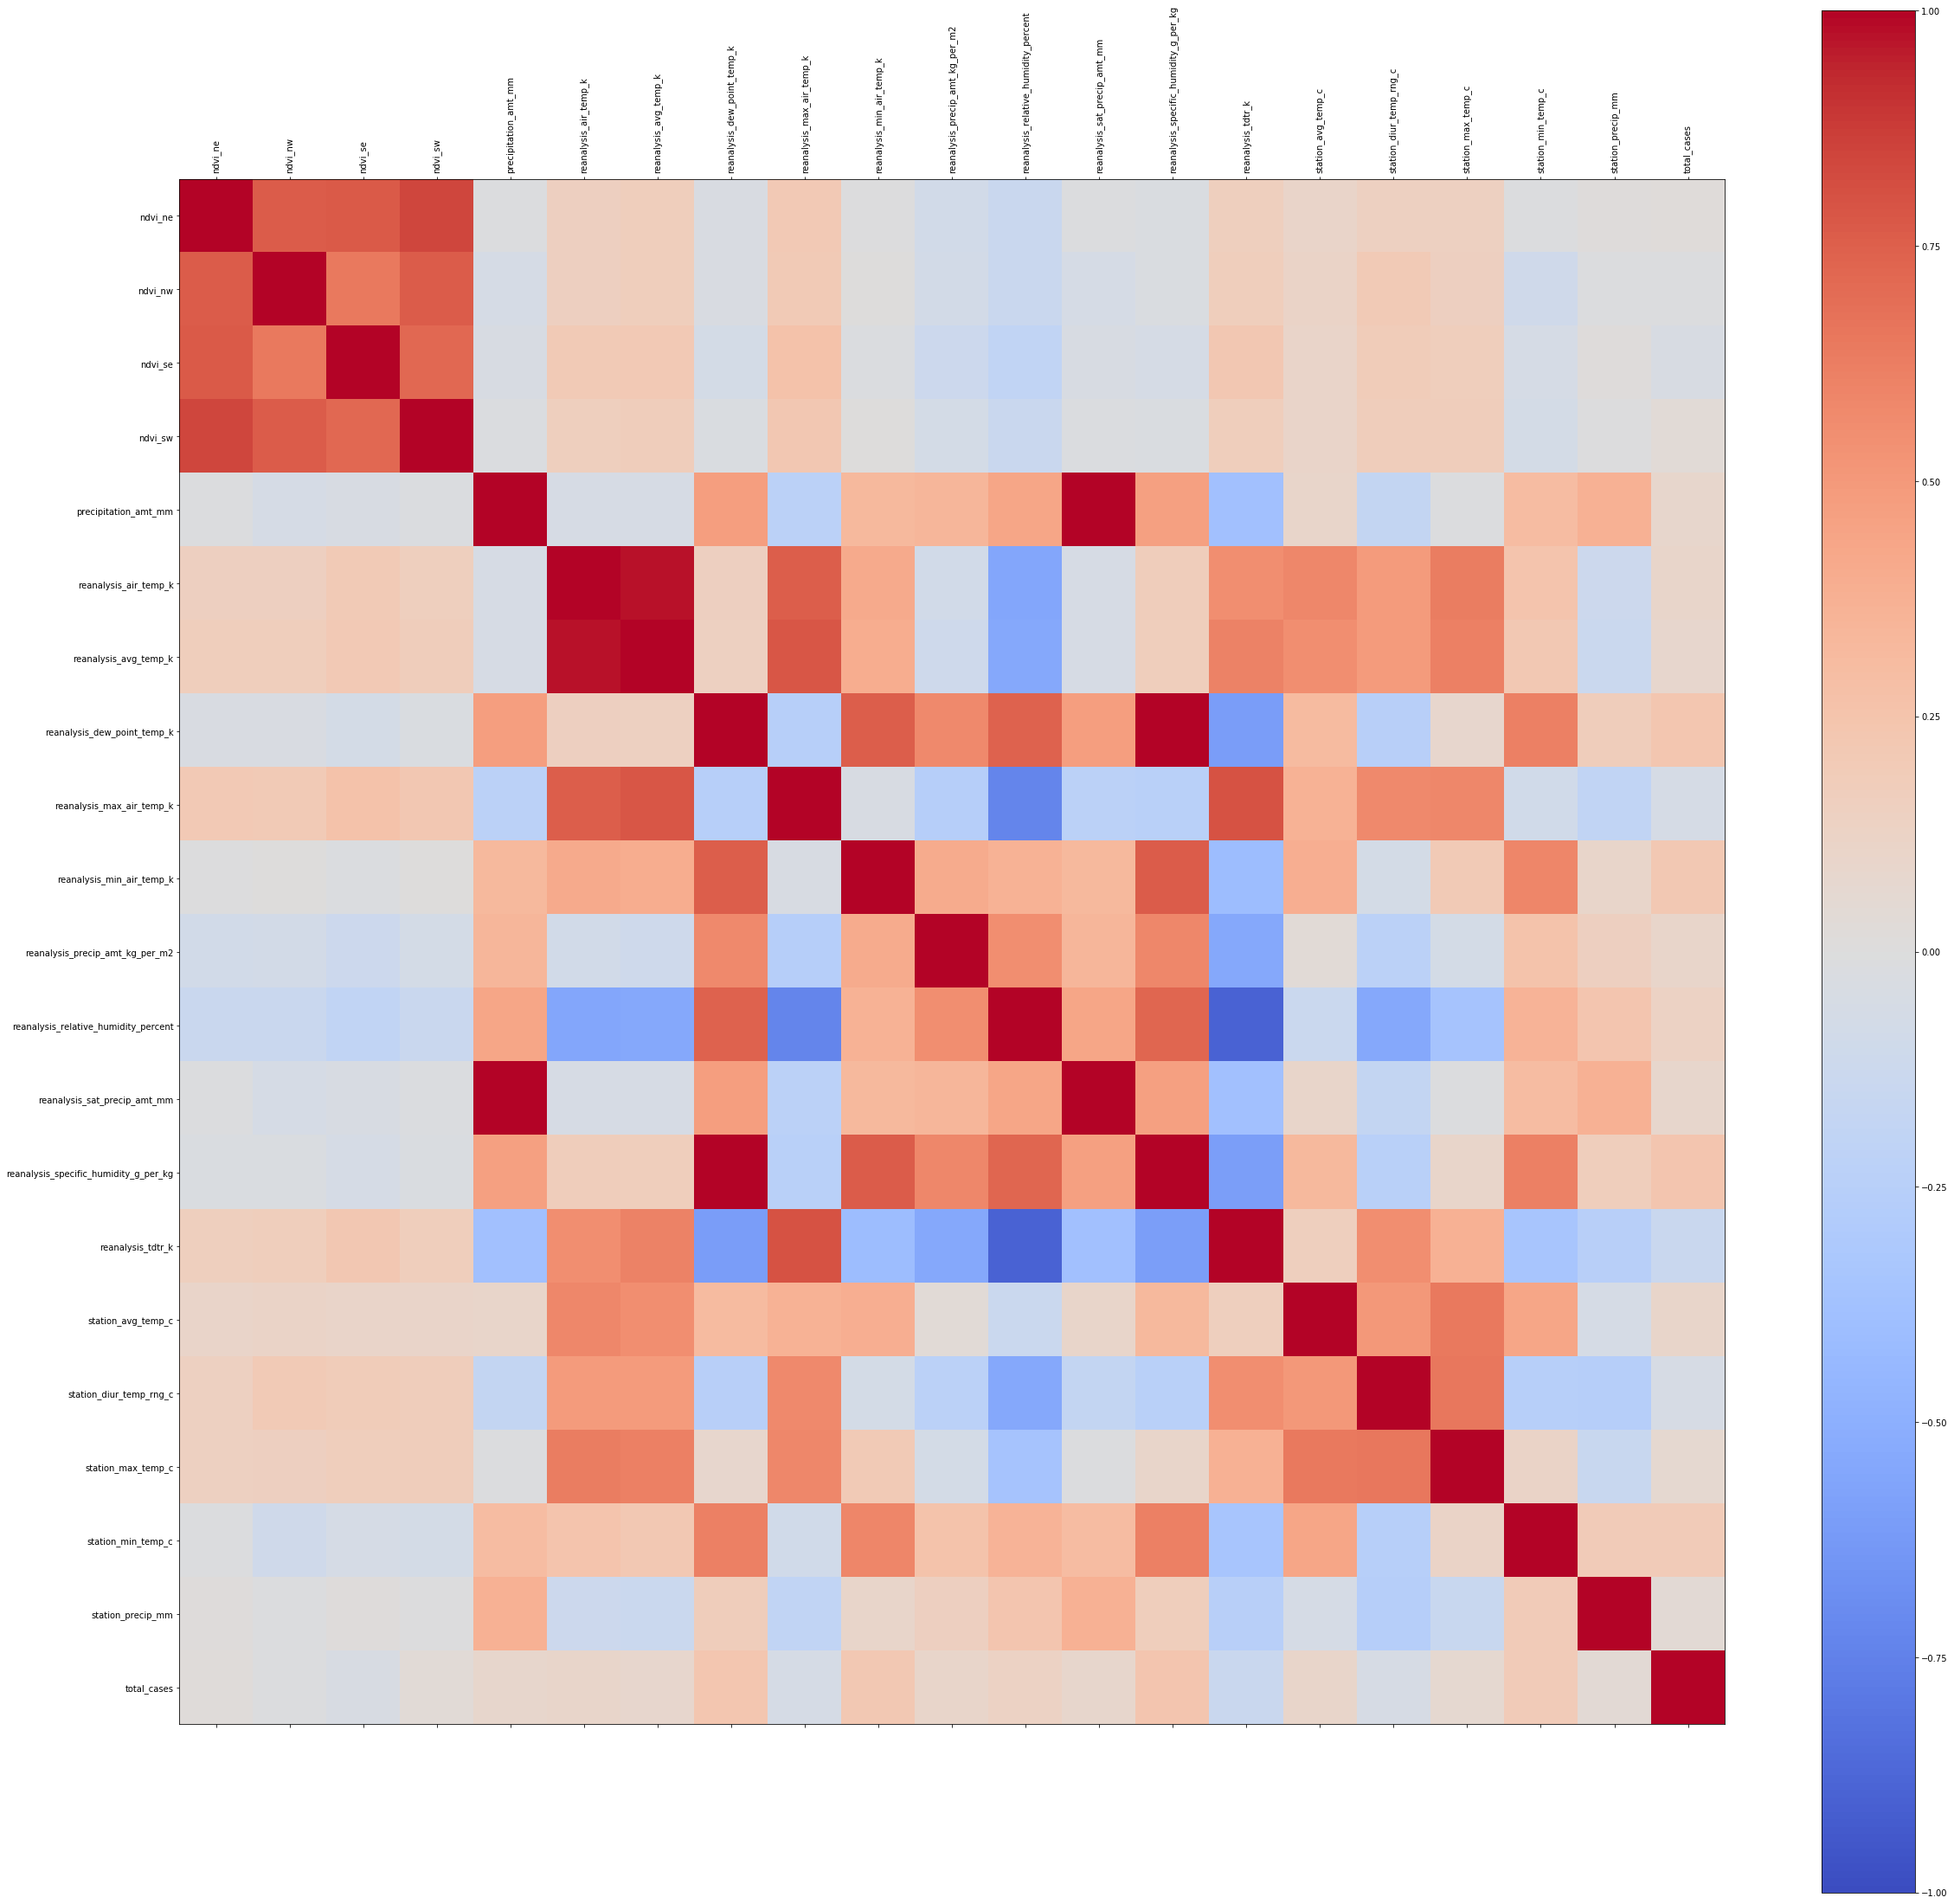

In [23]:
# plot correlation matrix for iq  (Mean Imputed Values)
data_matrix_iq = data_train_iq.drop(["city", "year", "weekofyear", "week_start_date"], axis=1)

data_matrix_iq['total_cases'] = data_matrix_iq['total_cases'].astype('float')
corr_iq = data_matrix_iq.corr()
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_iq,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_matrix_iq.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_matrix_iq.columns)
ax.set_yticklabels(data_matrix_iq.columns)
plt.show()

## 3. Bar plot for iq

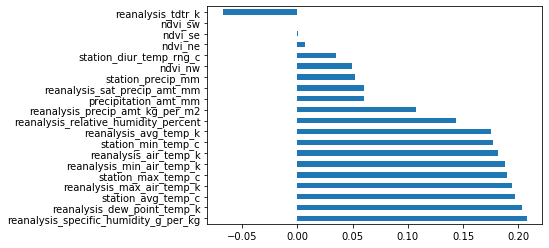

In [24]:
(corr_sj.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh())

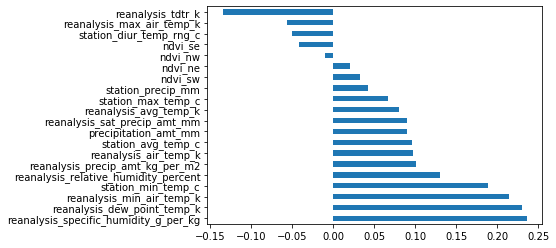

In [25]:
(corr_iq.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh())

# Last preprocessing: pd.DataFrame -> np.array

In [0]:
# Convert all the data to numpy arrays to use in our functions
X_data_train_sj = X_data_train_sj.to_numpy()
X_data_train_iq = X_data_train_iq.to_numpy()
y_data_train_sj = y_data_train_sj.to_numpy()
y_data_train_iq = y_data_train_iq.to_numpy()
X_data_test_sj = X_data_test_sj.to_numpy()
X_data_test_iq = X_data_test_iq.to_numpy()
X_train_regression_imputed_sj = X_train_regression_imputed_sj.to_numpy()
X_train_regression_imputed_iq = X_train_regression_imputed_iq.to_numpy()

# Shape check
assert X_data_train_sj.shape[1] == X_data_train_iq.shape[1]
assert X_data_train_sj.shape[0] == y_data_train_sj.shape[0]
assert X_data_test_sj.shape[1] == X_data_test_iq.shape[1]
assert X_data_train_iq.shape[0] == y_data_train_iq.shape[0]

# Baseline method: ElasticNet with Cross-Validation

In [0]:
def ElasticNetRegression(X, y, alps, l1_ratios_to_try, kfolds_num, X_test):
    # l1_ratios_to_try = [.1, .5, .7, .9, .95, .99, 1]
    ElasticNet = linear_model.ElasticNetCV
    elastic_net = ElasticNet(l1_ratio = l1_ratios_to_try, alphas = alps, cv = kfolds_num) 
    elastic_net.fit(X, y)
    y_pred = elastic_net.predict(X_test)
    return elastic_net, y_pred

# Evaluation of ElasticNet and save models to drive

In [28]:
prediction_function_CV = ElasticNetRegression
prediction_function_CV_str = "ElasticNetRegression"

models_sj = []
accuracies_mean_sj = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_data_train_sj):
  X_tr, X_te = X_data_train_sj[train_index], X_data_train_sj[test_index]
  y_tr, y_te = y_data_train_sj[train_index], y_data_train_sj[test_index]
  model_sj, y_pred = prediction_function_CV(X_tr, y_tr, alps=[x/10 for x in range(0,100,5)], l1_ratios_to_try = [.1, .5, .7, .9, .95, .99, 1], X_test=X_te, kfolds_num=5)
  accuracies_mean_sj.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
  models_sj.append(model_sj)
print('mean imputed, sj: ',sum(accuracies_mean_sj) / 5)

filename = "models_" + prediction_function_CV_str + "_mean_sj.pickle"
path = F"/content/gdrive/My Drive/models/{filename}" 
pickle.dump(models_sj, open(path, 'wb'))

models_iq = []
accuracies_mean_iq = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_data_train_iq):
  X_tr, X_te = X_data_train_iq[train_index], X_data_train_iq[test_index]
  y_tr, y_te = y_data_train_iq[train_index], y_data_train_iq[test_index]
  model_iq, y_pred = prediction_function_CV(X_tr, y_tr,alps=[x/10 for x in range(0,100,5)], l1_ratios_to_try = [.1, .5, .7, .9, .95, .99, 1], X_test=X_te, kfolds_num=5)
  accuracies_mean_iq.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
print('mean imputed, iq: ', sum(accuracies_mean_iq) / 5)

filename = "models_" + prediction_function_CV_str + "_mean_iq.pickle"
path = F"/content/gdrive/My Drive/models/{filename}" 
pickle.dump(models_iq, open(path, 'wb'))

# regression imputed

models_sj = []
accuracies_regr_sj = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train_regression_imputed_sj):
  X_tr, X_te = X_train_regression_imputed_sj[train_index], X_train_regression_imputed_sj[test_index]
  y_tr, y_te = y_data_train_sj[train_index], y_data_train_sj[test_index]
  model_sj, y_pred = prediction_function_CV(X_tr, y_tr, alps=[x/10 for x in range(0,100,5)], l1_ratios_to_try = [.1, .5, .7, .9, .95, .99, 1], X_test=X_te, kfolds_num=5)
  accuracies_regr_sj.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
  models_sj.append(model_sj)
print('regression imputed, sj: ',sum(accuracies_regr_sj) / 5)

filename = "models_" + prediction_function_CV_str + "_regression_sj.pickle"
path = F"/content/gdrive/My Drive/models/{filename}" 
pickle.dump(models_sj, open(path, 'wb'))

models_iq = []
accuracies_regr_iq = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train_regression_imputed_iq):
  X_tr, X_te = X_train_regression_imputed_iq[train_index], X_train_regression_imputed_iq[test_index]
  y_tr, y_te = y_data_train_iq[train_index], y_data_train_iq[test_index]
  model_iq, y_pred = prediction_function_CV(X_tr, y_tr, alps=[x/10 for x in range(0,100,5)], X_test=X_te, l1_ratios_to_try = [.1, .5, .7, .9, .95, .99, 1], kfolds_num=5)
  accuracies_regr_iq.append(sklearn.metrics.mean_absolute_error(y_pred, y_te))
  models_iq.append(model_iq)
print('regression imputed, iq: ',sum(accuracies_regr_iq) / 5)

filename = "models_" + prediction_function_CV_str + "_regression_iq.pickle"
path = F"/content/gdrive/My Drive/models/{filename}" 
pickle.dump(models_sj, open(path, 'wb'))

mean imputed, sj:  28.754224215744678
mean imputed, iq:  6.801391026470839
regression imputed, sj:  28.755503991913343
regression imputed, iq:  6.821166356215431


# Predict test values for hidden test set, save in CSV

In [0]:
y_pred = np.array(len(X_test_regression_imputed_sj) + len(X_test_regression_imputed_iq))
prediction_function_str = "ElasticNetRegression"


filename = "models_" + prediction_function_str + "_regression_sj.pickle"
path = F"/content/gdrive/My Drive/models/{filename}" 
models_sj = pickle.load(open(path, "rb"))
filename = "models_" + prediction_function_str + "_regression_iq.pickle"
path = F"/content/gdrive/My Drive/models/{filename}" 
models_iq = pickle.load(open(path, "rb"))

y_pred_sj = np.zeros(len(X_test_regression_imputed_sj))
for model in models_sj:
  y_pred_sj += model.predict(X_test_regression_imputed_sj)
y_pred_sj = y_pred_sj/5

y_pred_iq = np.zeros(len(X_test_regression_imputed_iq))
for model in models_sj:
  y_pred_iq += model.predict(X_test_regression_imputed_iq)
y_pred_iq = y_pred_iq/5

save_filename = 'y_pred.csv'
save_path = F"/content/gdrive/My Drive/models/{save_filename}"
y_pred = np.concatenate([y_pred_sj, y_pred_iq])
y_pred = y_pred.reshape((len(y_pred),1))
np.savetxt(save_path, y_pred, delimiter=',', fmt='%d')